In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# load_data() returns training and testing set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# check the data's dimensions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# 10 classes, digits from 0 to 9
print("All classes:", np.unique(y_train))

All classes: [0 1 2 3 4 5 6 7 8 9]


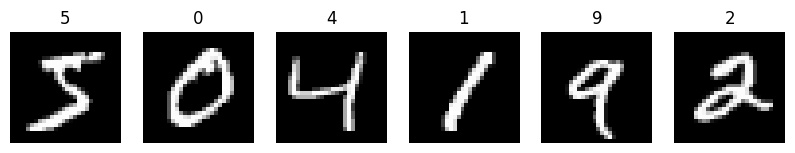

In [5]:
# display example images from the training set
fig, ax = plt.subplots(figsize=(10, 4), ncols=6, nrows=1)

for i in range(6):
  ax[i].set_title(y_train[i])
  ax[i].axis('off')
  ax[i].imshow(X_train[i], cmap='gray')

In [6]:
# reshape the data, so that it is suitable for the input layer
# by default: NxHxWxC, C needs to be at the end (Channel-last)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# new dimensions:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# normalisation - pixels from range [0-255] to [0-1]

def normalise_image(data):
  normalised = (data - np.min(data)) / (np.max(data) - np.min(data))
  return normalised

In [8]:
# max and min value for X_train before normalisation:
print(np.max(X_train))
print(np.min(X_train))

X_train = normalise_image(X_train)
X_test = normalise_image(X_test)

# max and min value after normalisation:
print(np.max(X_train))
print(np.min(X_train))

255
0
1.0
0.0


In [9]:
# one-hot labels (multiclass classification):

y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train = tf.keras.utils.to_categorical(y_train, 10)

# verify the result:
print(y_test[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
# separate part of the training set as validation data

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.9, shuffle=True, random_state=2765)

print(X_train.shape) # 54000 samples for the training set
print(X_val.shape) # 6000 samples for the validation set

(54000, 28, 28, 1)
(6000, 28, 28, 1)


Neural Network 1 - Convolutional and Dense layers

In [11]:
# Neural Network 1

i = tf.keras.layers.Input(shape=(28, 28, 1), dtype=tf.float32, name="input")
x = tf.keras.layers.Conv2D(8, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation="relu")(i) # padding='same' yields a very overfitted model
print(x.shape)
x1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid')(x)
print(x1.shape)
x2 = tf.keras.layers.Dense(10, activation="relu")(x1)
print(x2.shape)
x3 = tf.keras.layers.Flatten()(x2) # flatten the output to obtain a vector of 10 values (without the 13x13 dimension)
x4 = tf.keras.layers.Dense(10, activation="softmax")(x3)
print(x4.shape)
model1 = tf.keras.Model(i, x4, name="model1")

(None, 26, 26, 8)
(None, 13, 13, 8)
(None, 13, 13, 10)
(None, 10)


In [12]:
model1.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [13]:
training1 = model1.fit(X_train, y_train, epochs=9, validation_data=(X_val, y_val)) # small number of epochs, due to the quick overfitting of the model

Epoch 1/9
1688/1688 [==============================] - 21s 12ms/step - loss: 0.3272 - accuracy: 0.9050 - val_loss: 0.1489 - val_accuracy: 0.9590
Epoch 2/9
1688/1688 [==============================] - 21s 13ms/step - loss: 0.1220 - accuracy: 0.9643 - val_loss: 0.0951 - val_accuracy: 0.9702
Epoch 3/9
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0908 - accuracy: 0.9731 - val_loss: 0.0782 - val_accuracy: 0.9772
Epoch 4/9
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0756 - accuracy: 0.9776 - val_loss: 0.0812 - val_accuracy: 0.9740
Epoch 5/9
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0661 - accuracy: 0.9798 - val_loss: 0.0715 - val_accuracy: 0.9780
Epoch 6/9
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0581 - accuracy: 0.9818 - val_loss: 0.0714 - val_accuracy: 0.9755
Epoch 7/9
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.0657 - val_ac

In [14]:
y_pred1 = model1.predict(X_test)

313/313 [==============================] - 2s 5ms/step


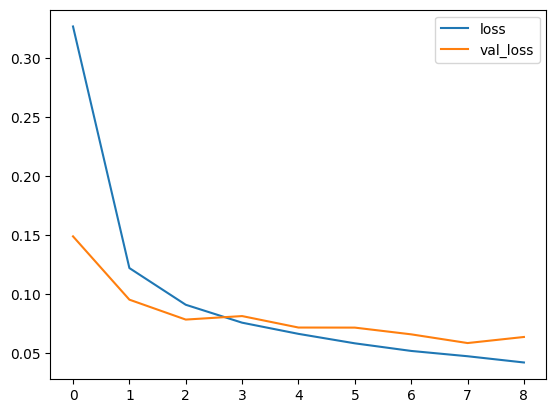

In [15]:
plt.plot(training1.history['loss'])
plt.plot(training1.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# not perfect, but learning was terminated when the difference between the
# training and validation set still wasn't too big

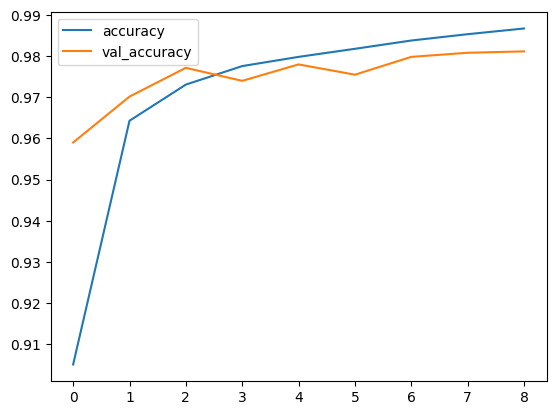

In [16]:
plt.plot(training1.history['accuracy'])
plt.plot(training1.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [17]:
# evaluation metrics - loss and accuracy:

loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("Loss: ", loss)
print("Accuracy: ", accuracy)
# high accuracy value (98%) and relatively small loss, good performance overall

Loss:  0.06041763350367546
Accuracy:  0.9800999760627747


In [18]:
# true and predicted labels -> where the probability is highest
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred1, axis=1)

In [19]:
# print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 970    0    1    0    0    1    5    1    2    0]
 [   0 1122    1    1    3    0    7    0    1    0]
 [   1    4 1006    1    2    0    4    8    5    1]
 [   1    0    2  984    0   10    0    5    6    2]
 [   1    0    1    0  967    0    5    0    1    7]
 [   2    0    0    3    0  877    7    0    3    0]
 [   6    1    0    0    1    2  948    0    0    0]
 [   0    1   10    1    2    0    0 1008    2    4]
 [   6    0    4    0    7    1   10    4  937    5]
 [   0    2    0    3   10    3    0    5    4  982]]


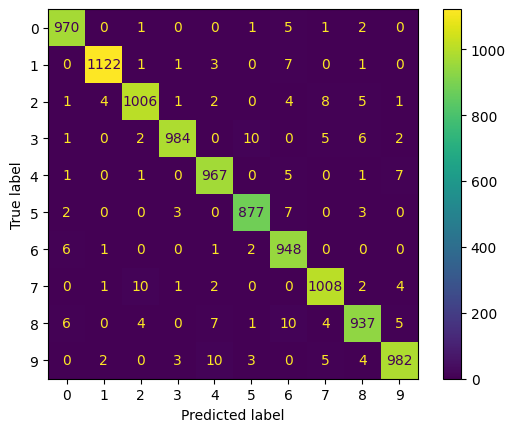

In [20]:
# display the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_true))
disp.plot()
plt.show()

# the most common mistakes were:
# 7 classified as 2, 9 classified as 4, 8 classified as 6, 3 classified as 5

Neural Network 2 - Dense layers only

In [21]:
# Neural Network 2
ii = tf.keras.layers.Input(shape=(28, 28, 1), dtype=tf.float32, name="input")
x = tf.keras.layers.Dense(50, activation="relu")(ii)
print(x.shape)
x1 = tf.keras.layers.Flatten()(x)
print(x1.shape)
x2 = tf.keras.layers.Dense(10, activation="softmax")(x1)
print(x2.shape)
model2 = tf.keras.Model(ii, x2, name="model2")

(None, 28, 28, 50)
(None, 39200)
(None, 10)


In [22]:
model2.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [23]:
training2 = model2.fit(X_train, y_train, epochs=9, validation_data=(X_val, y_val))

Epoch 1/9
1688/1688 [==============================] - 32s 19ms/step - loss: 0.3618 - accuracy: 0.8968 - val_loss: 0.2917 - val_accuracy: 0.9152
Epoch 2/9
1688/1688 [==============================] - 33s 20ms/step - loss: 0.2926 - accuracy: 0.9177 - val_loss: 0.2825 - val_accuracy: 0.9230
Epoch 3/9
1688/1688 [==============================] - 31s 18ms/step - loss: 0.2814 - accuracy: 0.9211 - val_loss: 0.2686 - val_accuracy: 0.9230
Epoch 4/9
1688/1688 [==============================] - 31s 18ms/step - loss: 0.2740 - accuracy: 0.9235 - val_loss: 0.2728 - val_accuracy: 0.9207
Epoch 5/9
1688/1688 [==============================] - 32s 19ms/step - loss: 0.2680 - accuracy: 0.9252 - val_loss: 0.2771 - val_accuracy: 0.9183
Epoch 6/9
1688/1688 [==============================] - 31s 18ms/step - loss: 0.2664 - accuracy: 0.9249 - val_loss: 0.2723 - val_accuracy: 0.9197
Epoch 7/9
1688/1688 [==============================] - 33s 19ms/step - loss: 0.2622 - accuracy: 0.9277 - val_loss: 0.2679 - val_ac

In [24]:
y_pred2 = model2.predict(X_test)

313/313 [==============================] - 2s 6ms/step


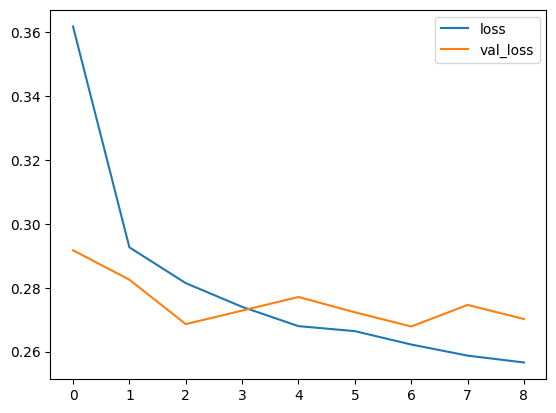

In [25]:
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# higher value of loss in case of the second NN

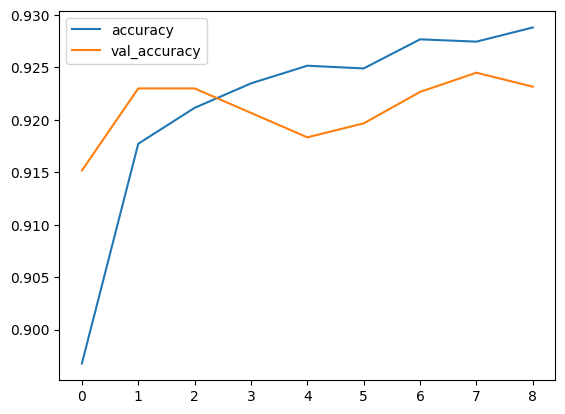

In [26]:
plt.plot(training2.history['accuracy'])
plt.plot(training2.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# small differences between accuracy for the training and validation sets,
# (scale of the plot is important!!), however for the validation set, the values
# start to oscillate

In [28]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

# second model turns out to perform worse, it makes more mistakes
# higher value of loss and lower accuracy (about 92%)

Loss:  0.27236300706863403
Accuracy:  0.9236000180244446


In [29]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred2, axis=1)

In [30]:
# print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 944    0    4    1    0   14   11    4    2    0]
 [   0 1115    5    1    0    2    4    2    6    0]
 [   3    7  949    8    8    8   11   11   25    2]
 [   2    1   23  891    0   45    3   14   26    5]
 [   1    2    8    3  901    0   11   11   11   34]
 [   7    4    4   20    6  808   11    4   25    3]
 [  10    3    8    1    7   25  900    1    3    0]
 [   1    7   25    3    4    1    0  965    2   20]
 [   4    7    9   17    7   45   11   12  857    5]
 [   7    8    1    8   18   11    0   39   11  906]]


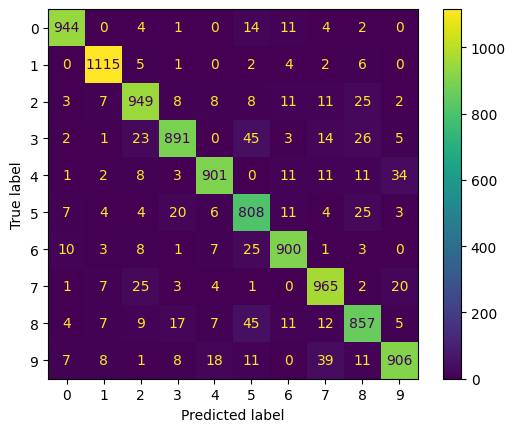

In [31]:
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_true))
disp.plot()
plt.show()

# most common mistakes are:
# 8 classified as 5, 3 classified as 5, 9 classified as 7, 4 classified as 9